In [51]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: C:\Users\Atharv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: C:\Users\Atharv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install --force-reinstall scipy==1.9.3 numpy==1.24 gensim==4.3.1

^C


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + meson setup C:\Users\Atharv\AppData\Local\Temp\pip-install-bo9571z6\scipy_e93c70543a2a4eb49e32f7a6650cebb9 C:\Users\Atharv\AppData\Local\Temp\pip-install-bo9571z6\scipy_e93c70543a2a4eb49e32f7a6650cebb9\.mesonpy-bh8565yd -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Atharv\AppData\Local\Temp\pip-install-bo9571z6\scipy_e93c70543a2a4eb49e32f7a6650cebb9\.mesonpy-bh8565yd\meson-python-native-file.ini
      The Meson build system
      Version: 1.7.2
      Source dir: C:\Users\Atharv\AppData\Local\Temp\pip-install-bo9571z6\scipy_e93c70543a2a4eb49e32f7a6650cebb9
      Build dir: C:\Users\Atharv\AppData\Local\Temp\pip-install-bo9571z6\scipy_e93c70543a2a4eb49e32f7a6650cebb9\.mesonpy-bh8565yd
      Build type: native build
      Project name: SciPy
      Project version: 1.9.3
      
      ..\meson.build:1:0

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.9.3.tar.gz (42.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


## Libraries

In [54]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: C:\Users\Atharv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [55]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from openpyxl import load_workbook
from sklearn.preprocessing import normalize
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
# Import necessary libraries


# Download required NLTK resources (run once if needed)
nltk.download('stopwords')
# Download required NLTK resources (run this once)
nltk.download('punkt')  # For tokenization
nltk.download('punkt_tab')
nltk.download('wordnet')  # For lemmatization

# Load the Excel file
# Replace 'path_to_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('C:\\Users\\Atharv\\Desktop\\DS203\\Session-Summary-for-E6-project.xlsx')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Cleaning and tokenization

In [56]:
import nltk
nltk.download('punkt')
import nltk



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
def clean_text(text, strict=False, return_tokens=False):
    """
    Clean the text by removing numbers, punctuation, extra spaces,
    and optionally applying strict token filtering.

    Args:
        text (str): Input text to clean.
        strict (bool): If True, use dictionary-based filtering; if False, use general cleaning.
        return_tokens (bool): If True, return list of tokens; if False, return cleaned string.

    Returns:
        str or list: Cleaned text or list of cleaned tokens.
    """
    # Step 1: Basic text cleaning
    text = re.sub(r'\d+', '', text)           # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)       # Remove punctuation
    text = text.lower()                       # Convert to lowercase
    text = ' '.join(text.split())             # Remove extra spaces

    # Step 2: Tokenize the cleaned text
    tokens = word_tokenize(text)

    # Step 3: Clean tokens further
    cleaned_tokens = []
    if strict:
        # Load English word set for strict filtering
        word_set = set(words.words()).union({'mean', 'beta'})  # Add custom terms if needed
        for token in tokens:
            # Remove special characters (redundant here but ensures consistency)
            cleaned_token = re.sub(r'[^a-zA-Z0-9]', '', token)
            # Skip if empty, too short, or not in dictionary
            if (cleaned_token and
                len(cleaned_token) > 2 and
                cleaned_token.isalnum() and
                cleaned_token in word_set):
                cleaned_tokens.append(cleaned_token)
    else:
        # General cleaning (no dictionary)
        for token in tokens:
            cleaned_token = re.sub(r'[^a-zA-Z0-9]', '', token)
            # Skip if empty or too short
            if cleaned_token and len(cleaned_token) > 2 and cleaned_token.isalnum():
                cleaned_tokens.append(cleaned_token)

    # Step 4: Return based on preference
    if return_tokens:
        return cleaned_tokens
    return ' '.join(cleaned_tokens)


In [58]:
df['cleaned_summary'] = df['Session_Summary'].apply(clean_text)

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [59]:
def tokenize_and_lemmatize(text):
    """
    Tokenize the text into words and apply lemmatization.
    Returns a list of lemmatized tokens.
    """
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stop_words = set(stopwords.words('english'))

    # Remove stop words
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]
    return filtered_tokens

In [60]:
df['filtered_tokens'] = df['cleaned_summary'].apply(tokenize_and_lemmatize)
# Display the first few rows to verify (optional)
print(df[['SerialNo', 'Session_Summary', 'cleaned_summary', 'filtered_tokens']].head())

   SerialNo                                    Session_Summary  \
0         1  we started our lecture with a recap of previou...   
1         2  in this session, we explored various feature e...   
2         3  population and sample were further discussed u...   
3         4  we first looked at all the summaries and obser...   
4         5  midsem metrics for evaluation and also discuss...   

                                     cleaned_summary  \
0  started our lecture with recap previous lectur...   
1  this session explored various feature encoding...   
2  population and sample were further discussed u...   
3  first looked all the summaries and observed fr...   
4  midsem metrics for evaluation and also discuss...   

                                     filtered_tokens  
0  [started, lecture, recap, previous, lecture, p...  
1  [session, explored, various, feature, encoding...  
2  [population, sample, discussed, upon, sample, ...  
3  [first, looked, summary, observed, graph, n

## TimePass

In [61]:
# Find the maximum length of vectors in df['filtered_tokens']
max_length = max(df['filtered_tokens'].apply(len))

# Find the index of the maximum-sized vector
max_index = df['filtered_tokens'].apply(len).idxmax()

# Retrieve the maximum-sized vector
max_vector = df.loc[max_index, 'filtered_tokens']

print("Maximum vector length:", max_length)
print("Index of maximum vector:", max_index)
# print("Maximum-sized vector:", max_vector)


Maximum vector length: 828
Index of maximum vector: 27


# self defined Corpus Word Embedding

In [62]:
# Assuming 'filtered_tokens' is a column with lists of tokens
# Example: [['cat', 'mat', 'sit'], ['dog', 'bark', 'loud']]

# Step 1: Build a vocabulary from all unique tokens
all_tokens = [token for tokens in df['filtered_tokens'] for token in tokens]
vocab = sorted(set(all_tokens))  # List of unique tokens
vocab_size = len(vocab)
token_to_idx = {token: idx for idx, token in enumerate(vocab)}  # Mapping token -> index

# Step 2: Function to convert tokens to a 2D one-hot matrix
def tokens_to_onehot_matrix(tokens, vocab_size, token_to_idx):
    matrix = np.zeros((len(tokens), vocab_size))  # Shape: (n_tokens, vocab_size)
    for i, token in enumerate(tokens):
        if token in token_to_idx:  # Only if token is in vocab
            matrix[i, token_to_idx[token]] = 1
    return matrix

# Step 3: Apply to each summary's filtered_tokens
df['onehot_matrix'] = df['filtered_tokens'].apply(
    lambda tokens: tokens_to_onehot_matrix(tokens, vocab_size, token_to_idx)
)

# Check results
# for idx, row in df.head().iterrows():
#     print(f"Summary {idx}:")
#     print(f"Tokens: {row['filtered_tokens']}")
#     print(f"Matrix shape: {row['onehot_matrix'].shape}")
#     print(f"Matrix:\n{row['onehot_matrix']}\n")

In [63]:
# Assuming 'df' contains a column 'filtered_tokens' with lists of tokens
# Example: df['filtered_tokens'] = [['cat', 'mat', 'sit'], ['dog', 'bark', 'loud']]

# Step 1: Build a vocabulary from all unique tokens
all_tokens = [token for tokens in df['filtered_tokens'] for token in tokens]
vocab = sorted(set(all_tokens))  # List of unique tokens
vocab_size = len(vocab)
token_to_idx = {token: idx for idx, token in enumerate(vocab)}  # Mapping token -> index

# Step 2: Function to convert tokens to a 2D one-hot matrix
def tokens_to_onehot_matrix(tokens, vocab_size, token_to_idx):
    matrix = np.zeros((len(tokens), vocab_size))  # Shape: (n_tokens, vocab_size)
    for i, token in enumerate(tokens):
        if token in token_to_idx:  # Only if token is in vocab
            matrix[i, token_to_idx[token]] = 1
    return matrix

# Step 3: Apply to each summary's filtered_tokens
df['onehot_matrix'] = df['filtered_tokens'].apply(
    lambda tokens: tokens_to_onehot_matrix(tokens, vocab_size, token_to_idx)
)

# Step 4: Compute averaged feature vector
def average_onehot_vector(onehot_matrix):
    if onehot_matrix.shape[0] == 0:  # Handle case with no tokens
        return np.zeros(vocab_size)
    return np.mean(onehot_matrix, axis=0)  # Average across tokens

df['feature_vector'] = df['onehot_matrix'].apply(average_onehot_vector)

# Check results
for idx, row in df.head().iterrows():
    print(f"Summary {idx}:")
    # print(f"Tokens: {row['filtered_tokens']}")
    print(f"Averaged Feature Vector Shape: {row['feature_vector'].shape}")
    print(f"Averaged Feature Vector:\n{repr(row['feature_vector'])}\n")

Summary 0:
Averaged Feature Vector Shape: (4673,)
Averaged Feature Vector:
array([0., 0., 0., ..., 0., 0., 0.])

Summary 1:
Averaged Feature Vector Shape: (4673,)
Averaged Feature Vector:
array([0., 0., 0., ..., 0., 0., 0.])

Summary 2:
Averaged Feature Vector Shape: (4673,)
Averaged Feature Vector:
array([0., 0., 0., ..., 0., 0., 0.])

Summary 3:
Averaged Feature Vector Shape: (4673,)
Averaged Feature Vector:
array([0., 0., 0., ..., 0., 0., 0.])

Summary 4:
Averaged Feature Vector Shape: (4673,)
Averaged Feature Vector:
array([0., 0., 0., ..., 0., 0., 0.])



In [64]:
# Step 1: Convert feature vectors into a NumPy array
X = np.vstack(df['feature_vector'].values)  # Stack feature vectors into matrix

# Step 2: Apply K-Means Clustering
k = 20  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)  # Assign cluster labels

# Step 3: Print results
print(df[['filtered_tokens', 'cluster']].head())  # Show sample clustering

# Step 4: Check cluster distribution
print(df['cluster'].value_counts())  # How many summaries in each cluster?


                                     filtered_tokens  cluster
0  [started, lecture, recap, previous, lecture, p...       15
1  [session, explored, various, feature, encoding...       12
2  [population, sample, discussed, upon, sample, ...        6
3  [first, looked, summary, observed, graph, numb...       15
4  [midsem, metric, evaluation, also, discussion,...       18
cluster
15    107
8      80
7      71
6      53
4      51
9      50
1      48
14     41
5      40
2      36
12     33
11     31
10      9
16      6
17      5
18      2
19      2
0       1
3       1
13      1
Name: count, dtype: int64


In [65]:
df['feature_vector']

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
663    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
664    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
665    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
666    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
667    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: feature_vector, Length: 668, dtype: object

C:\Users\Atharv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


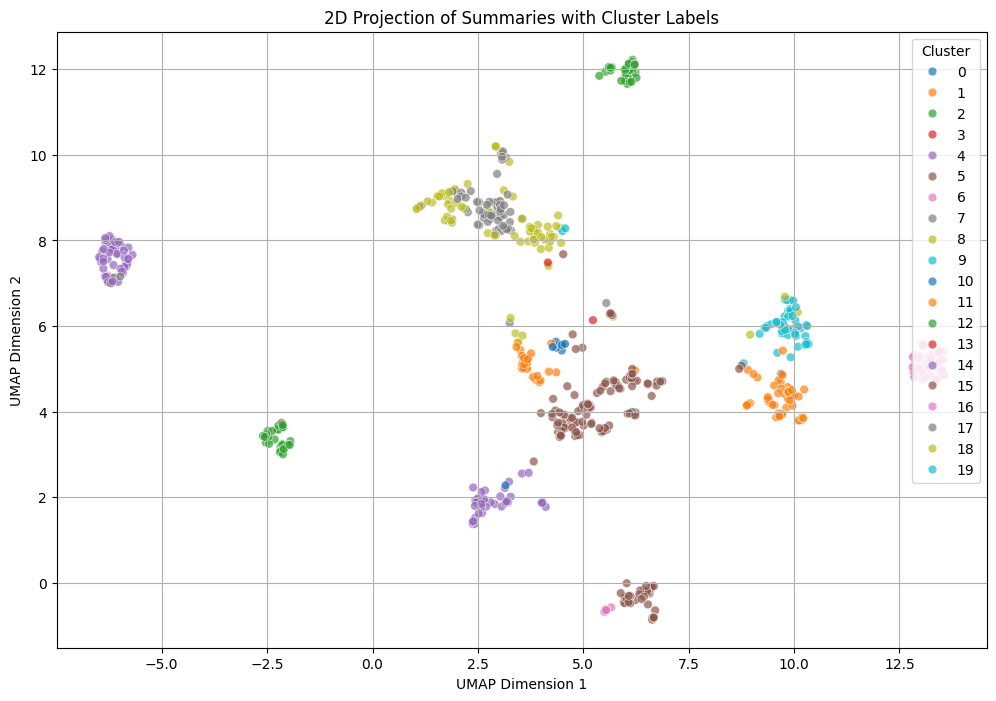

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap

# Step 1: Use your precomputed embeddings
X = np.vstack(df['feature_vector'].values)

# Step 2: UMAP dimensionality reduction
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(X)

# Step 3: Store UMAP coordinates
df['umap_x'] = embedding_2d[:, 0]
df['umap_y'] = embedding_2d[:, 1]

# Step 4: Plot only points with cluster labels
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", len(set(df['cluster'])))
sns.scatterplot(
    x='umap_x',
    y='umap_y',
    hue='cluster',
    data=df,
    palette=palette,
    s=40,
    alpha=0.7
)
plt.title("2D Projection of Summaries with Cluster Labels")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [67]:


# Compute Silhouette Score
sil_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

# Print the clusters
print(df[['filtered_tokens', 'cluster']])

Silhouette Score: 0.0609
                                       filtered_tokens  cluster
0    [started, lecture, recap, previous, lecture, p...       15
1    [session, explored, various, feature, encoding...       12
2    [population, sample, discussed, upon, sample, ...        6
3    [first, looked, summary, observed, graph, numb...       15
4    [midsem, metric, evaluation, also, discussion,...       18
..                                                 ...      ...
663  [lecture, learnt, population, sample, majorly,...        6
664  [today, continued, discussion, statistical, si...       15
665  [beginning, sir, explained, way, determine, nu...       14
666  [studied, crispdm, cross, industry, standard, ...        7
667  [today, class, interpreted, pvalues, confidenc...        1

[668 rows x 2 columns]


In [68]:

with pd.ExcelWriter("summary_clusters.xlsx", engine="openpyxl", mode="w") as writer:
    df.to_excel(writer, sheet_name="Basic_Euclidean_avg", index=False)


# Cosine Similarity with Self-defined Corpus Embedding

In [69]:
# Step 1: Convert feature vectors into NumPy matrix
X = np.vstack(df['feature_vector'].values)  # Shape: (n_summaries, vector_dim)

# Step 2: Normalize vectors (convert to unit vectors)
X_normalized = normalize(X, norm='l2', axis=1)  # L2 normalization ensures unit length

# Step 3: Apply K-Means Clustering
k = 20  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_normalized)  # Assign cluster labels

# Step 4: Print results
print(df[['filtered_tokens', 'cluster']].head())  # Show sample clustering

# Step 5: Check cluster distribution
print(df['cluster'].value_counts())  # How many summaries in each cluster?


                                     filtered_tokens  cluster
0  [started, lecture, recap, previous, lecture, p...        6
1  [session, explored, various, feature, encoding...        8
2  [population, sample, discussed, upon, sample, ...        3
3  [first, looked, summary, observed, graph, numb...        6
4  [midsem, metric, evaluation, also, discussion,...       12
cluster
10    63
3     53
5     48
6     47
1     46
11    44
16    41
9     40
19    35
8     33
13    32
14    29
18    28
4     27
7     24
2     20
12    17
17    17
0     15
15     9
Name: count, dtype: int64


In [70]:


# Compute Silhouette Score
sil_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

# Print the clusters
print(df[['filtered_tokens', 'cluster']])

Silhouette Score: 0.0444
                                       filtered_tokens  cluster
0    [started, lecture, recap, previous, lecture, p...        6
1    [session, explored, various, feature, encoding...        8
2    [population, sample, discussed, upon, sample, ...        3
3    [first, looked, summary, observed, graph, numb...        6
4    [midsem, metric, evaluation, also, discussion,...       12
..                                                 ...      ...
663  [lecture, learnt, population, sample, majorly,...        3
664  [today, continued, discussion, statistical, si...       11
665  [beginning, sir, explained, way, determine, nu...       16
666  [studied, crispdm, cross, industry, standard, ...       10
667  [today, class, interpreted, pvalues, confidenc...       17

[668 rows x 2 columns]


In [71]:
with pd.ExcelWriter("summary_clusters.xlsx", engine="openpyxl", mode="a",if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="Basic_Cosine_similarity_avg", index=False)

In [72]:
df.drop(columns=['cluster', 'feature_vector', 'onehot_matrix'], inplace=True)


## Embedding with semantic meaning being captured.(Word2vec)

In [73]:
sentences = df['filtered_tokens'].tolist()  # Convert tokenized sentences into list format
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def sentence_to_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

df['word2vec_embedding'] = df['filtered_tokens'].apply(lambda tokens: sentence_to_vector(tokens, w2v_model, 100))


In [74]:
df['word2vec_embedding'][0]

array([-0.22683895,  0.3783351 ,  0.16799478,  0.04936728,  0.1575124 ,
       -0.5755179 ,  0.1284937 ,  0.85668045, -0.33802676, -0.19878554,
       -0.1859422 , -0.64489543, -0.17476375,  0.23697475,  0.16412424,
       -0.3493008 ,  0.20137174, -0.51024556,  0.00617292, -0.62731093,
        0.4327603 ,  0.18501268,  0.23576854, -0.28523993, -0.19025733,
       -0.07691285, -0.36627138, -0.417249  , -0.3209869 , -0.12531084,
        0.47882128, -0.09432119,  0.23390345, -0.05416775, -0.1325308 ,
        0.5785017 , -0.04252892, -0.19185495, -0.28653836, -0.5959926 ,
        0.08205712, -0.2757547 , -0.30135253,  0.0480116 ,  0.21011232,
       -0.15657459, -0.33355793,  0.08076303,  0.12046088,  0.32424712,
        0.34338528, -0.2997703 ,  0.03385681,  0.07441362, -0.21632293,
        0.4064502 ,  0.31855616, -0.04823663, -0.24633338,  0.12681328,
       -0.19761305,  0.11401208, -0.02945344, -0.34093127, -0.5217696 ,
        0.06560237,  0.01095414,  0.34188083, -0.61400753,  0.37

In [75]:
X = np.vstack(df['word2vec_embedding'].values)  # Convert list of arrays to 2D array
num_clusters = 19# Adjust based on your data

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster_wv'] = kmeans.fit_predict(X)

print(df[['filtered_tokens', 'cluster_wv']])

                                       filtered_tokens  cluster_wv
0    [started, lecture, recap, previous, lecture, p...          10
1    [session, explored, various, feature, encoding...          15
2    [population, sample, discussed, upon, sample, ...           4
3    [first, looked, summary, observed, graph, numb...           1
4    [midsem, metric, evaluation, also, discussion,...           1
..                                                 ...         ...
663  [lecture, learnt, population, sample, majorly,...          13
664  [today, continued, discussion, statistical, si...          10
665  [beginning, sir, explained, way, determine, nu...          18
666  [studied, crispdm, cross, industry, standard, ...           8
667  [today, class, interpreted, pvalues, confidenc...           4

[668 rows x 2 columns]


In [76]:
print(df['cluster_wv'].value_counts())

cluster_wv
1     117
5      85
10     72
16     44
13     42
17     40
9      30
0      30
4      29
2      28
8      28
3      25
15     20
18     20
7      18
14     17
12     12
6      10
11      1
Name: count, dtype: int64


In [77]:
with pd.ExcelWriter("summary_clusters.xlsx", engine="openpyxl", mode="a",if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="Word2Vec_euclidean_dist_avg", index=False)


In [78]:
# Normalize word2vec embeddings to unit vectors
X = np.vstack(df['word2vec_embedding'].values)  # Convert list of arrays to 2D array
X = normalize(X, axis=1)  # Normalize row-wise for cosine similarity approximation

num_clusters = 19  # Adjust based on your data

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster_wv'] = kmeans.fit_predict(X)

print(df[['filtered_tokens', 'cluster_wv']])

                                       filtered_tokens  cluster_wv
0    [started, lecture, recap, previous, lecture, p...           5
1    [session, explored, various, feature, encoding...           7
2    [population, sample, discussed, upon, sample, ...           4
3    [first, looked, summary, observed, graph, numb...          13
4    [midsem, metric, evaluation, also, discussion,...           3
..                                                 ...         ...
663  [lecture, learnt, population, sample, majorly,...          18
664  [today, continued, discussion, statistical, si...           5
665  [beginning, sir, explained, way, determine, nu...           3
666  [studied, crispdm, cross, industry, standard, ...           9
667  [today, class, interpreted, pvalues, confidenc...           4

[668 rows x 2 columns]


In [79]:
sil_score = silhouette_score(X, df['cluster_wv'])
print(f"Silhouette Score: {sil_score:.4f}")
print(df[['filtered_tokens', 'cluster_wv']])

Silhouette Score: 0.2688
                                       filtered_tokens  cluster_wv
0    [started, lecture, recap, previous, lecture, p...           5
1    [session, explored, various, feature, encoding...           7
2    [population, sample, discussed, upon, sample, ...           4
3    [first, looked, summary, observed, graph, numb...          13
4    [midsem, metric, evaluation, also, discussion,...           3
..                                                 ...         ...
663  [lecture, learnt, population, sample, majorly,...          18
664  [today, continued, discussion, statistical, si...           5
665  [beginning, sir, explained, way, determine, nu...           3
666  [studied, crispdm, cross, industry, standard, ...           9
667  [today, class, interpreted, pvalues, confidenc...           4

[668 rows x 2 columns]


C:\Users\Atharv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


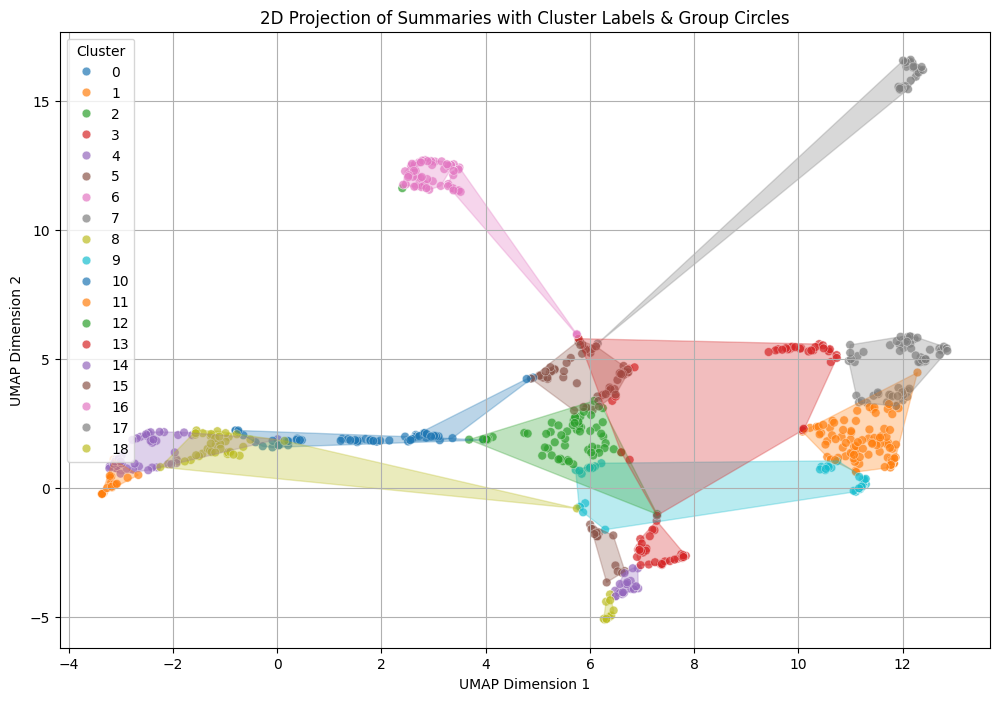

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

# UMAP already done:
X = np.vstack(df['word2vec_embedding'].values)
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(X)
df['umap_x'] = embedding_2d[:, 0]
df['umap_y'] = embedding_2d[:, 1]

# Plot with hulls
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", len(set(df['cluster_wv'])))

# Scatter plot
sns.scatterplot(
    x='umap_x',
    y='umap_y',
    hue='cluster_wv',
    data=df,
    palette=palette,
    s=40,
    alpha=0.7
)

# Draw translucent convex hulls around each cluster
for cluster_id in sorted(df['cluster_wv'].unique()):
    cluster_points = df[df['cluster_wv'] == cluster_id][['umap_x', 'umap_y']].values
    if len(cluster_points) >= 3:  # ConvexHull needs at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        polygon = Polygon(
            hull_points,
            closed=True,
            fill=True,
            alpha=0.3,
            color=palette[cluster_id % len(palette)]
        )
        plt.gca().add_patch(polygon)

plt.title("2D Projection of Summaries with Cluster Labels & Group Circles")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [81]:
with pd.ExcelWriter("summary_clusters.xlsx", engine="openpyxl", mode="a",if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="Word2Vec_cosine_similarity_avg", index=False)

In [ ]:
df

,SerialNo,Session_Summary,cleaned_summary,filtered_tokens,umap_x,umap_y,word2vec_embedding,cluster_wv
0,1,we started our lecture with a recap of previou...,started our lecture with recap previous lectur...,"[started, lecture, recap, previous, lecture, p...",7.278236,6.875121,"[-0.22754161, 0.31804094, 0.036156055, 0.10116...",4
1,2,"in this session, we explored various feature e...",this session explored various feature encoding...,"[session, explored, various, feature, encoding...",14.341316,0.334400,"[-0.28721023, 0.37067434, 0.11157517, 0.109176...",7
2,3,population and sample were further discussed u...,population and sample were further discussed u...,"[population, sample, discussed, upon, sample, ...",0.123782,11.930562,"[0.017147686, 0.3072653, 0.17760259, -0.015583...",10
3,4,we first looked at all the summaries and obser...,first looked all the summaries and observed fr...,"[first, looked, summary, observed, graph, numb...",11.199906,5.699594,"[-0.23370041, 0.34252673, 0.09154823, 0.081886...",1
4,5,midsem metrics for evaluation and also discuss...,midsem metrics for evaluation and also discuss...,"[midsem, metric, evaluation, also, discussion,...",10.727016,13.472036,"[-0.23508482, 0.34234902, 0.11757636, 0.072315...",1
...,...,...,...,...,...,...,...,...
663,664,in this lecture we have learnt about what is p...,this lecture have learnt about what population...,"[lecture, learnt, population, sample, majorly,...",1.545632,11.717758,"[-0.03390424, 0.3372175, 0.15496567, 0.0093229...",10
664,665,"today, we continued our discussion on statisti...",today continued our discussion statistical sig...,"[today, continued, discussion, statistical, si...",7.322902,7.196750,"[-0.19975887, 0.3117511, 0.040656403, 0.097630...",4
665,666,"at the beginning, sir explained what are the w...",the beginning sir explained what are the ways ...,"[beginning, sir, explained, way, determine, nu...",10.198684,13.568314,"[-0.23506188, 0.32562244, 0.061452158, 0.07336...",6
666,667,we studied about crisp-dm\n(cross industry sta...,studied about crispdm cross industry standard ...,"[studied, crispdm, cross, industry, standard, ...",14.125055,9.935630,"[-0.13716352, 0.29681504, 0.12321731, 0.039275...",11


## Cosine tf-idf

In [82]:
# Prepare TF-IDF
df['text_for_tfidf'] = df['filtered_tokens'].apply(' '.join)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_for_tfidf'])

# Create vocabulary mapping
index_to_word = {idx: word for word, idx in tfidf_vectorizer.vocabulary_.items()}

def hybrid_embedding(tokens, model, tfidf_row, vector_size=100):
    vectors = []
    weights = []

    # Get TF-IDF scores for document words
    for idx, score in zip(tfidf_row.indices, tfidf_row.data):
        word = index_to_word[idx]
        if word in tokens and word in model.wv:
            vectors.append(model.wv[word])
            weights.append(score)

    if not vectors:
        return np.zeros(vector_size)

    # Normalize weights and compute weighted average
    weights = np.array(weights) / sum(weights)
    return np.dot(weights.T, vectors)

# Apply to create hybrid embeddings
df['hybrid_embedding'] = [
    hybrid_embedding(row['filtered_tokens'], w2v_model, tfidf_matrix[i], 100)
    for i, row in df.iterrows()
]


In [83]:
df['hybrid_embedding']

0      [-0.18049579002900887, 0.31948036030199045, 0....
1      [-0.24059763017246077, 0.3455128396046595, 0.1...
2      [0.007302951450602032, 0.27927564923970355, 0....
3      [-0.1804103899446815, 0.312889703544155, 0.172...
4      [-0.202160612730887, 0.3256257456223797, 0.200...
                             ...                        
663    [-0.030194607875131924, 0.3167388340265349, 0....
664    [-0.15812761766192404, 0.3024599684954804, 0.1...
665    [-0.1857973663869229, 0.29962332768974087, 0.1...
666    [-0.0957443632259423, 0.2271776397455475, 0.14...
667    [-0.006479314724932938, 0.2993760997217801, 0....
Name: hybrid_embedding, Length: 668, dtype: object

In [84]:
# Normalize word2vec embeddings to unit vectors
X = np.vstack(df['hybrid_embedding'].values)  # Convert list of arrays to 2D array
X = normalize(X, axis=1)  # Normalize row-wise for cosine similarity approximation

num_clusters = 19  # Adjust based on your data

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster_tf-idf_wv'] = kmeans.fit_predict(X)

print(df[['filtered_tokens', 'cluster_tf-idf_wv']])


                                       filtered_tokens  cluster_tf-idf_wv
0    [started, lecture, recap, previous, lecture, p...                  4
1    [session, explored, various, feature, encoding...                  3
2    [population, sample, discussed, upon, sample, ...                 11
3    [first, looked, summary, observed, graph, numb...                  9
4    [midsem, metric, evaluation, also, discussion,...                  9
..                                                 ...                ...
663  [lecture, learnt, population, sample, majorly,...                 11
664  [today, continued, discussion, statistical, si...                  4
665  [beginning, sir, explained, way, determine, nu...                  1
666  [studied, crispdm, cross, industry, standard, ...                 12
667  [today, class, interpreted, pvalues, confidenc...                 11

[668 rows x 2 columns]


In [85]:
from umap import UMAP


In [88]:
with pd.ExcelWriter("C:\\Users\\Atharv\\Desktop\\DS203\\summary_clusters.xlsx", engine="openpyxl", mode="a",if_sheet_exists="replace") as writer:
    df.to_excel(writer, sheet_name="TF-idf-Word2Vec_cosine_avg", index=False)

C:\Users\Atharv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


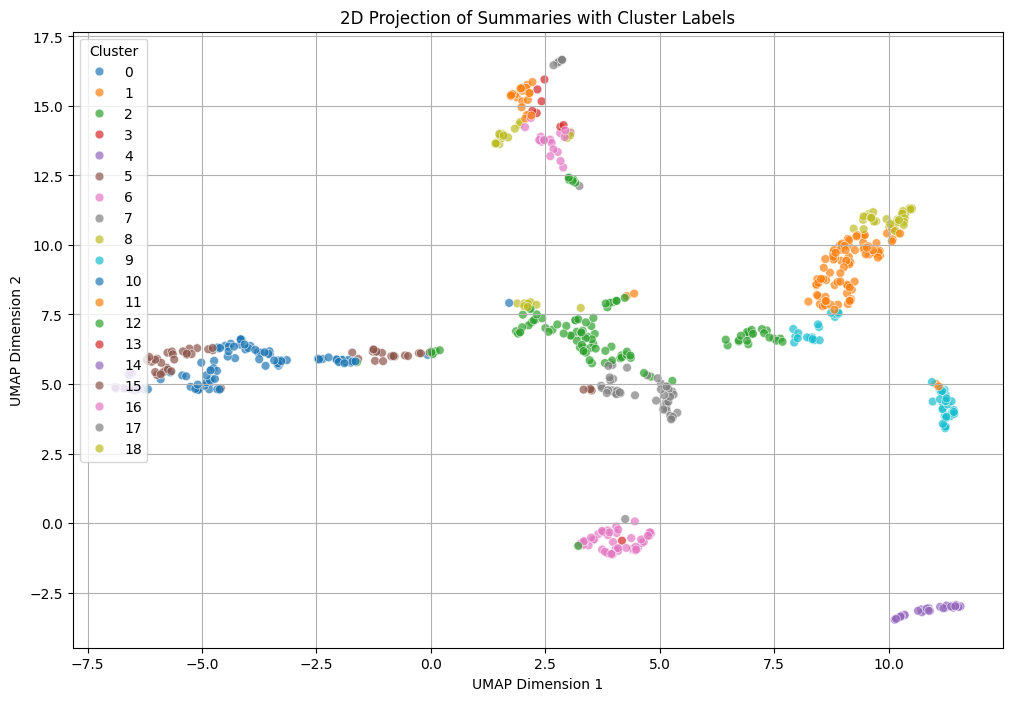

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap

# Step 1: Use your precomputed embeddings
X = np.vstack(df['hybrid_embedding'].values)

# Step 2: UMAP dimensionality reduction
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(X)

# Step 3: Store UMAP coordinates
df['umap_x'] = embedding_2d[:, 0]
df['umap_y'] = embedding_2d[:, 1]

# Step 4: Plot only points with cluster labels
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", len(set(df['cluster_tf-idf_wv'])))
sns.scatterplot(
    x='umap_x',
    y='umap_y',
    hue='cluster_tf-idf_wv',
    data=df,
    palette=palette,
    s=40,
    alpha=0.7)






plt.title("2D Projection of Summaries with Cluster Labels")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


C:\Users\Atharv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


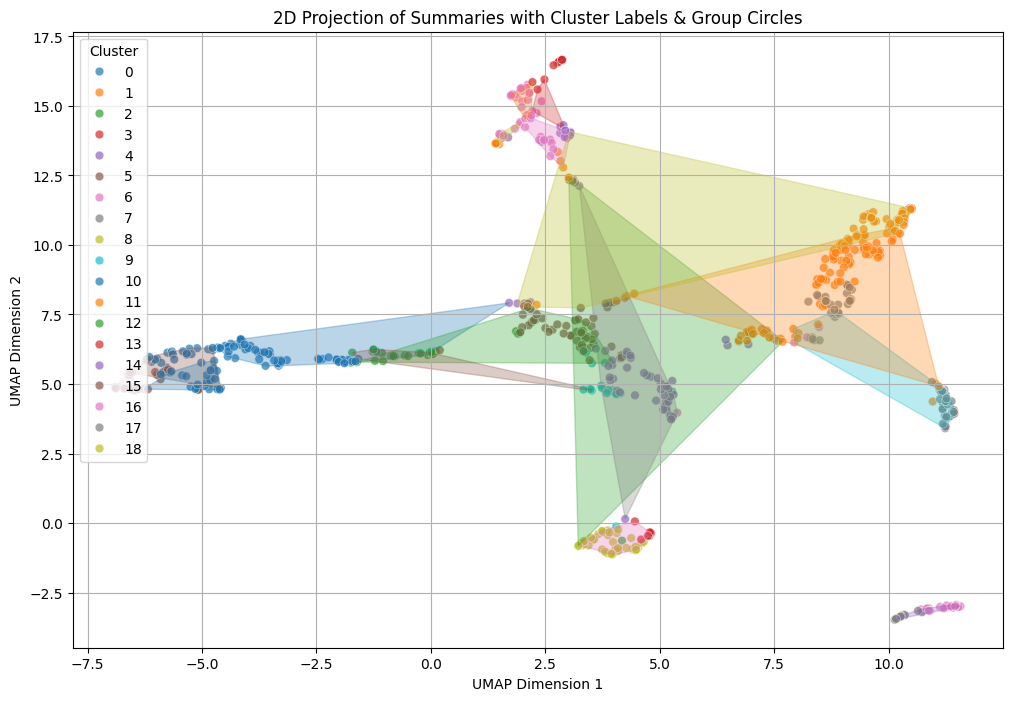

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

# UMAP already done:
X = np.vstack(df['hybrid_embedding'].values)
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(X)
df['umap_x'] = embedding_2d[:, 0]
df['umap_y'] = embedding_2d[:, 1]

# Plot with hulls
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", len(set(df['cluster_tf-idf_wv'])))

# Scatter plot
sns.scatterplot(
    x='umap_x',
    y='umap_y',
    hue='cluster_wv',
    data=df,
    palette=palette,
    s=40,
    alpha=0.7
)

# Draw translucent convex hulls around each cluster
for cluster_id in sorted(df['cluster_tf-idf_wv'].unique()):
    cluster_points = df[df['cluster_tf-idf_wv'] == cluster_id][['umap_x', 'umap_y']].values
    if len(cluster_points) >= 3:  # ConvexHull needs at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        polygon = Polygon(
            hull_points,
            closed=True,
            fill=True,
            alpha=0.3,
            color=palette[cluster_id % len(palette)]
        )
        plt.gca().add_patch(polygon)

plt.title("2D Projection of Summaries with Cluster Labels & Group Circles")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
# Compute Silhouette Score
sil_score = silhouette_score(X, df['cluster_tf-idf_wv'])
print(f"Silhouette Score: {sil_score:.4f}")

# Print the clusters
print(df[['filtered_tokens', 'cluster_tf-idf_wv']])

Silhouette Score: 0.0148
                                       filtered_tokens  cluster_tf-idf_wv
0    [started, lecture, recap, previous, lecture, p...                  7
1    [session, explored, various, feature, encoding...                  4
2    [population, sample, discussed, upon, sample, ...                  5
3    [first, looked, summary, observed, graph, numb...                  2
4    [midsem, metric, evaluation, also, discussion,...                 11
..                                                 ...                ...
663  [lecture, learnt, population, sample, majorly,...                  5
664  [today, continued, discussion, statistical, si...                  7
665  [beginning, sir, explained, way, determine, nu...                 16
666  [studied, crispdm, cross, industry, standard, ...                 18
667  [today, class, interpreted, pvalues, confidenc...                  5

[668 rows x 2 columns]


C:\Users\Atharv\AppData\Local\Temp\ipykernel_30708\659549915.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


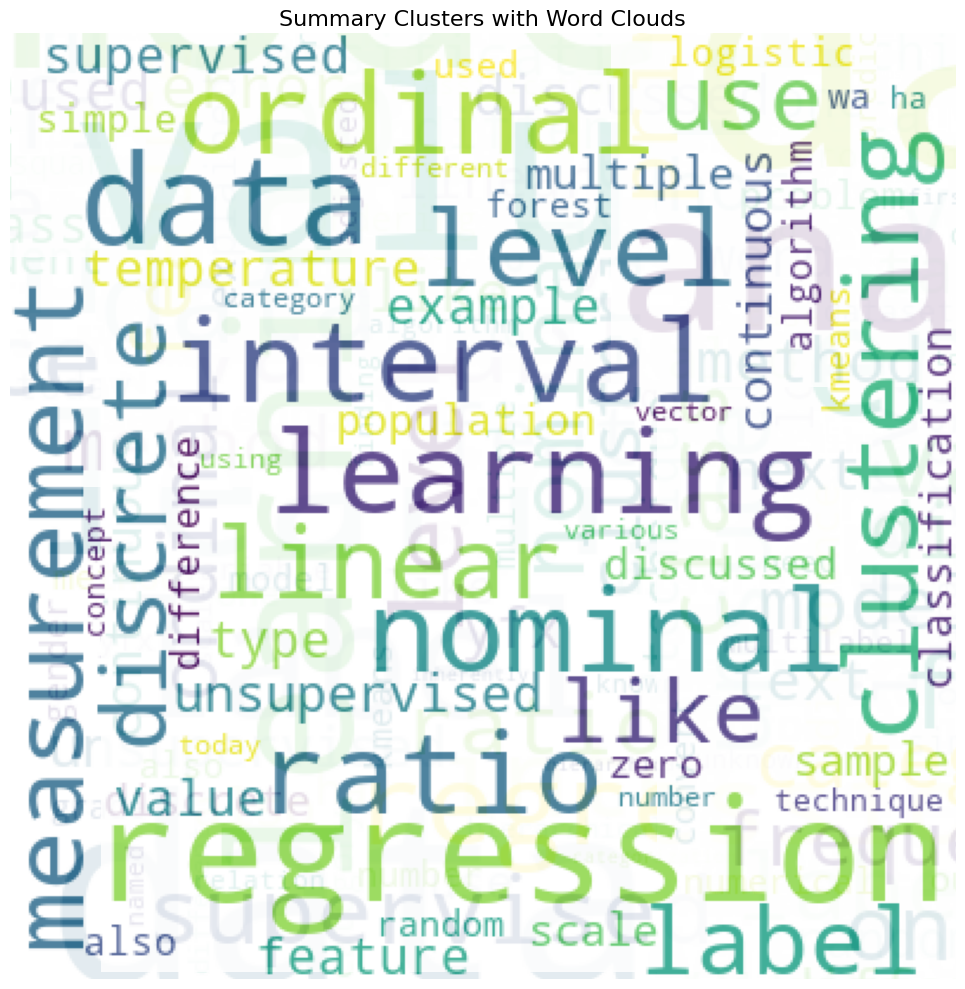

In [ ]:
from wordcloud import WordCloud
from collections import defaultdict

# Step 1: Token aggregation for each summary cluster
cluster_tokens = defaultdict(list)
for tokens, label in zip(df['filtered_tokens'], df['cluster_wv']):
    cluster_tokens[label].extend(tokens)

# Step 2: Generate word clouds
cluster_wordclouds = {}
for label, tokens in cluster_tokens.items():
    freqs = defaultdict(int)
    for t in tokens:
        freqs[t] += 1
    wc = WordCloud(background_color="white", max_words=50, width=400, height=400).generate_from_frequencies(freqs)
    cluster_wordclouds[label] = wc

# Step 3: Overlay word clouds at cluster centers
fig, ax = plt.subplots(figsize=(14, 10))
n_clusters = len(set(df['cluster_wv']))
colors = plt.cm.get_cmap('tab10', n_clusters)

for label in range(n_clusters):
    indices = df[df['cluster_wv'] == label].index
    x = df.loc[indices, 'umap_x']
    y = df.loc[indices, 'umap_y']
    ax.scatter(x, y, s=30, color=colors(label), label=f"Cluster {label}", alpha=0.6)

    # Word cloud overlay
    if label in cluster_wordclouds:
        center_x, center_y = np.mean(x), np.mean(y)
        wc_img = cluster_wordclouds[label].to_array()
        ax.imshow(wc_img, extent=(center_x-5, center_x+5, center_y-5, center_y+5), alpha=0.85, zorder=10)

ax.set_title("Summary Clusters with Word Clouds", fontsize=16)
ax.axis('off')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


Total number of summaries: 668


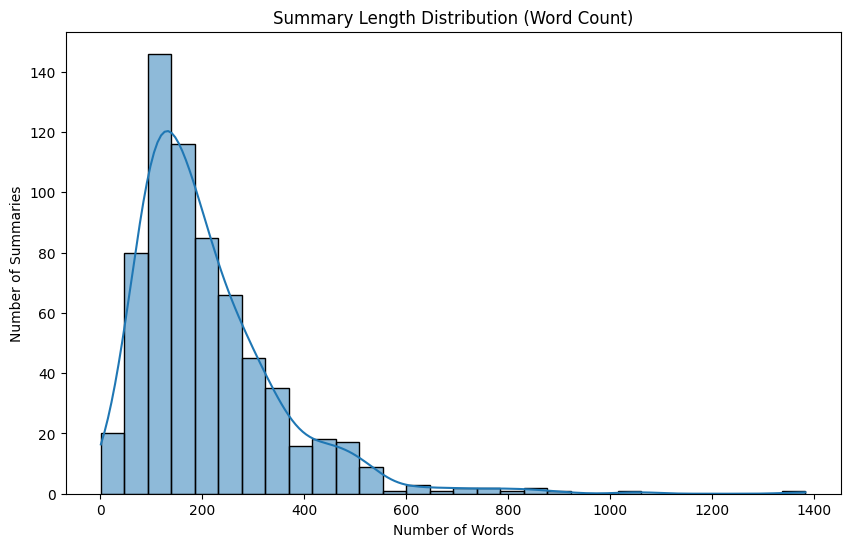

Number of unusually short summaries (<10 words): 3

Top 5 Summaries with Most Words:
Summary Index 27: 1384 words
Summary Index 182: 1055 words
Summary Index 529: 894 words
Summary Index 203: 838 words
Summary Index 624: 837 words

Bottom 5 Summaries with Least Words:
Summary Index 20: 1 words
Summary Index 627: 4 words
Summary Index 600: 6 words
Summary Index 24: 12 words
Summary Index 584: 12 words


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Make sure to import re

# Number of summaries
print("Total number of summaries:", len(df))

# Word and sentence count per summary
df['word_count'] = df['Session_Summary'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['Session_Summary'].apply(lambda x: len(re.findall(r'[.!?]', str(x))))

# Length distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Summary Length Distribution (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Summaries")
plt.savefig("summary_length_distribution.png")
plt.show()

# Short summaries
short_summaries = df[df['word_count'] < 10]
print("Number of unusually short summaries (<10 words):", len(short_summaries))

# Top 5 summaries with most words
top_5_longest = df.sort_values(by='word_count', ascending=False).head(5)
print("\nTop 5 Summaries with Most Words:")
for i, row in top_5_longest.iterrows():
    print(f"Summary Index {i}: {row['word_count']} words")

# Bottom 5 summaries with least words (excluding empty ones if needed)
bottom_5_shortest = df[df['word_count'] > 0].sort_values(by='word_count', ascending=True).head(5)
print("\nBottom 5 Summaries with Least Words:")
for i, row in bottom_5_shortest.iterrows():
    print(f"Summary Index {i}: {row['word_count']} words")


In [ ]:
# Token counts before and after stopword removal
df['token_count_raw'] = df['cleaned_summary'].apply(lambda x: len(x.split()))
df['token_count_filtered'] = df['filtered_tokens'].apply(len)

# Percentage removed
df['percent_removed'] = 100 * (df['token_count_raw'] - df['token_count_filtered']) / df['token_count_raw']
print("Average % of tokens removed as stopwords:", df['percent_removed'].mean())

# Frequent tokens before and after
from collections import Counter

all_raw_tokens = [token for text in df['cleaned_summary'] for token in text.split()]
all_filtered_tokens = [token for tokens in df['filtered_tokens'] for token in tokens]

print("\nTop 10 Frequent Raw Tokens:")
print(Counter(all_raw_tokens).most_common(10))

print("\nTop 10 Frequent Non-Stopword Tokens:")
print(Counter(all_filtered_tokens).most_common(10))


Average % of tokens removed as stopwords: 28.559842761722088

Top 10 Frequent Raw Tokens:
[('the', 8524), ('and', 4006), ('data', 2384), ('for', 1403), ('that', 1254), ('which', 1093), ('are', 1031), ('with', 1003), ('regression', 1002), ('then', 939)]

Top 10 Frequent Non-Stopword Tokens:
[('data', 2388), ('model', 1218), ('value', 1047), ('regression', 1004), ('feature', 879), ('sample', 763), ('mean', 669), ('also', 661), ('class', 610), ('linear', 537)]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
X_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

df['rank_length'] = df['word_count'].rank(ascending=False)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['cleaned_summary'])
df['tfidf_score'] = tfidf_matrix.sum(axis=1).A1
df['rank_tfidf'] = df['tfidf_score'].rank(ascending=False)
centroids = kmeans.cluster_centers_
df['similarity_to_centroid'] = [cosine_similarity([vec], [centroids[label]])[0][0]
                                 for vec, label in zip(df['hybrid_embedding'], df['cluster_wv'])]
df['rank_centroid_similarity'] = df.groupby('cluster_wv')['similarity_to_centroid'].rank(ascending=False)
top_summaries = df.sort_values(['cluster_wv', 'rank_centroid_similarity']).groupby('cluster_wv').head(3)
for c in range(num_clusters):
    print(f"\nTop word counts for cluster {c}:")
    summaries = top_summaries[top_summaries['cluster_wv'] == c]['Session_Summary'].values
    word_counts = sorted([len(summary.split()) for summary in summaries], reverse=True)
    print(word_counts)






Top word counts for cluster 0:
[262, 219, 151]

Top word counts for cluster 1:
[479, 216, 125]

Top word counts for cluster 2:
[1]

Top word counts for cluster 3:
[138, 128, 104]

Top word counts for cluster 4:
[166, 94, 91]

Top word counts for cluster 5:
[354, 228, 187]

Top word counts for cluster 6:
[301, 193, 62]

Top word counts for cluster 7:
[154, 140, 116]

Top word counts for cluster 8:
[543, 183, 78]

Top word counts for cluster 9:
[441, 53, 48]

Top word counts for cluster 10:
[120, 115, 102]

Top word counts for cluster 11:
[405, 350, 223]

Top word counts for cluster 12:
[292, 222, 193]

Top word counts for cluster 13:
[77, 50, 50]

Top word counts for cluster 14:
[196, 178, 137]

Top word counts for cluster 15:
[258, 106, 85]

Top word counts for cluster 16:
[84, 73, 16]

Top word counts for cluster 17:
[350, 127, 79]

Top word counts for cluster 18:
[505, 362, 335]


In [ ]:

def keywords_to_vector(keywords, model, vector_size=100):
    tokens = [token.lower() for token in keywords if token.lower() in model.wv]
    if not tokens:
        return np.zeros(vector_size)
    vectors = [model.wv[token] for token in tokens]
    return np.mean(vectors, axis=0)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_relevant_session(keyword_list, df, model, cluster_col='cluster_tf-idf_wv', top_k=3):
    # Convert keywords to vector
    keyword_vec = keywords_to_vector(keyword_list, model)
    keyword_vec = keyword_vec.reshape(1, -1)

    # Normalize both for cosine similarity
    summary_vectors = np.vstack(df['hybrid_embedding'].values)
    summary_vectors_norm = normalize(summary_vectors, axis=1)
    keyword_vec_norm = normalize(keyword_vec)

    # Compute cosine similarity
    similarities = cosine_similarity(summary_vectors_norm, keyword_vec_norm).flatten()

    # Attach similarity score to the DataFrame
    df['similarity_to_keyword'] = similarities

    # Find top-matching cluster based on average similarity
    avg_sim_by_cluster = df.groupby(cluster_col)['similarity_to_keyword'].mean()
    most_similar_cluster = avg_sim_by_cluster.idxmax()

    print(f"\n🔍 Most relevant session cluster for keywords {keyword_list}: Cluster {most_similar_cluster}")

    # Return top-k summaries from that cluster
    top_summaries = (
        df[df[cluster_col] == most_similar_cluster]
        .sort_values(by='similarity_to_keyword', ascending=False)
        .head(top_k)[['Session_Summary', 'similarity_to_keyword']]
    )
    return top_summaries


keywords_list=['pca']
model=w2v_model

find_most_relevant_session(keywords_list, df, model, cluster_col='cluster_tf-idf_wv', top_k=3)




🔍 Most relevant session cluster for keywords ['pca']: Cluster 9


,Session_Summary,similarity_to_keyword
615,focused on principal component analysis (pca) ...,0.990601
574,the session highlighted the use of principal c...,0.990102
99,today covered principal component analysis (pc...,0.989101
